# CS4035 - Cyber Data Analytics
## Lab 2 

## Group Number: 69

## Student 1 
### Name : Konrad Ponichtera
### ID : 5580749

## Student 2
### Name : Ion Babalau
### ID : 5626110

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

from collections import Counter
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score


In [2]:
nb = nbformat.read("Lab2.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 1928


## README

Expected location of dataset: _data_ directory, in same directory as notebook. 
All the necessary packages are specifeid in _requirements.txt_, and can be installed with the command: `pip install -r requirements.txt`

## 1. Familiarization with data

### Plot visualizations

#### Reading data set

In [3]:
df = pd.read_csv("data/train_data.csv")
df.head()

,Id,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
0,0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
1,1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2,2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
3,3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
4,4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [4]:
df.describe()

,Id,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
count,496800.000000,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0,496800.0
mean,248399.500000,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,...,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0,0.0
std,143413.951204,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,...,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0,0.0
min,0.000000,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,...,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0,0.0
25%,124199.750000,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,...,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0,0.0
50%,248399.500000,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,...,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0,0.0
75%,372599.250000,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,...,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0,0.0
max,496799.000000,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,...,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0,0.0


#### Cleaning up the data set

There are values we can safely drop, since they don't bring any additional value, like the row ID and the label, which takes only one value.
What's more, there are certain other features like P-201 or P-202 which take only one value.
This means that checking them can be done through simple assertion, without using machine learning.
Therefore we decided to remove them from the data set.

In [5]:
# Drop useless columns
df = df.drop(columns=['Id', 'Label'])

# Drop colums which take only one value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(columns=[col])

#### Measuring correlation

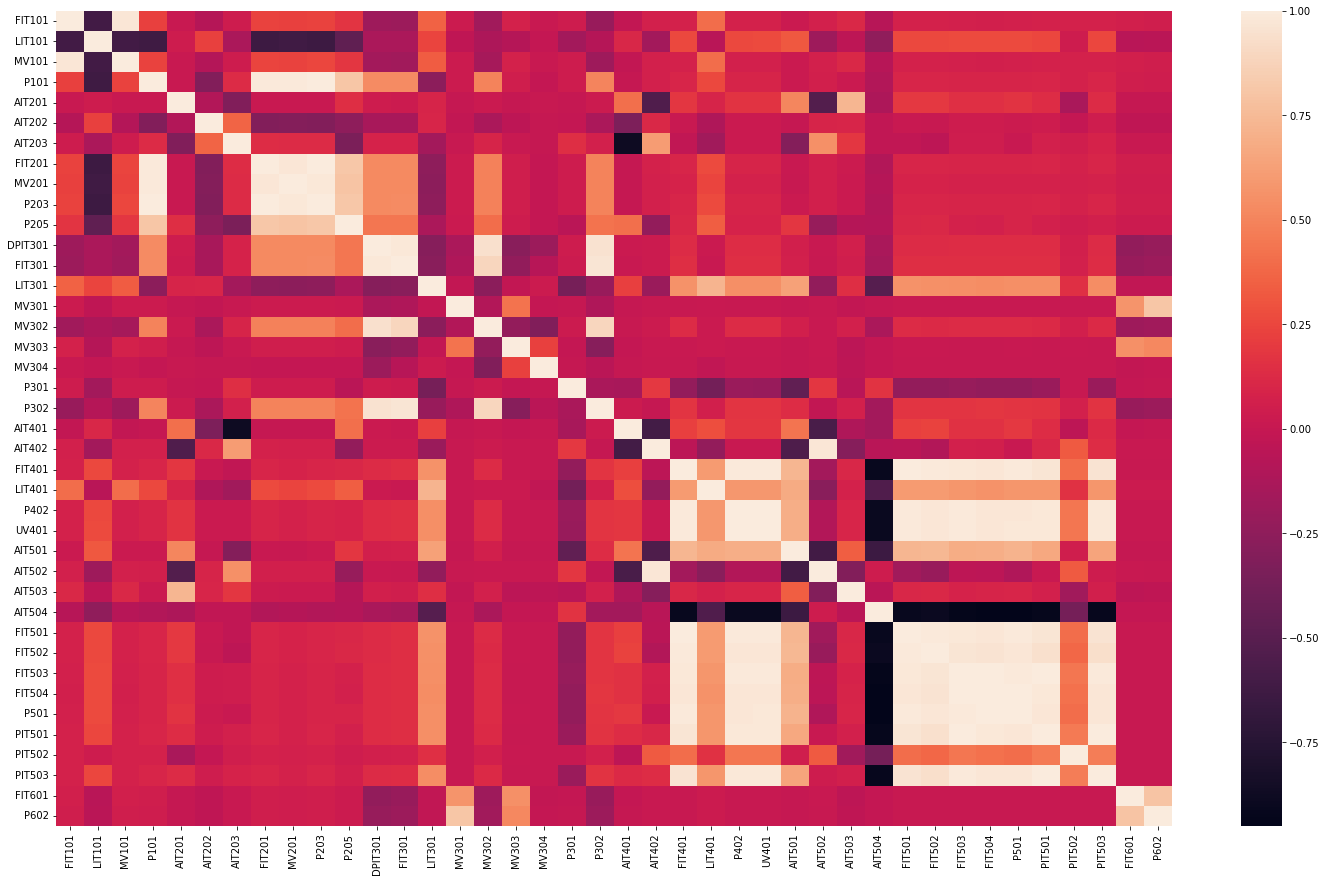

In [6]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr())
plt.show()

#### Observing temporal behavior

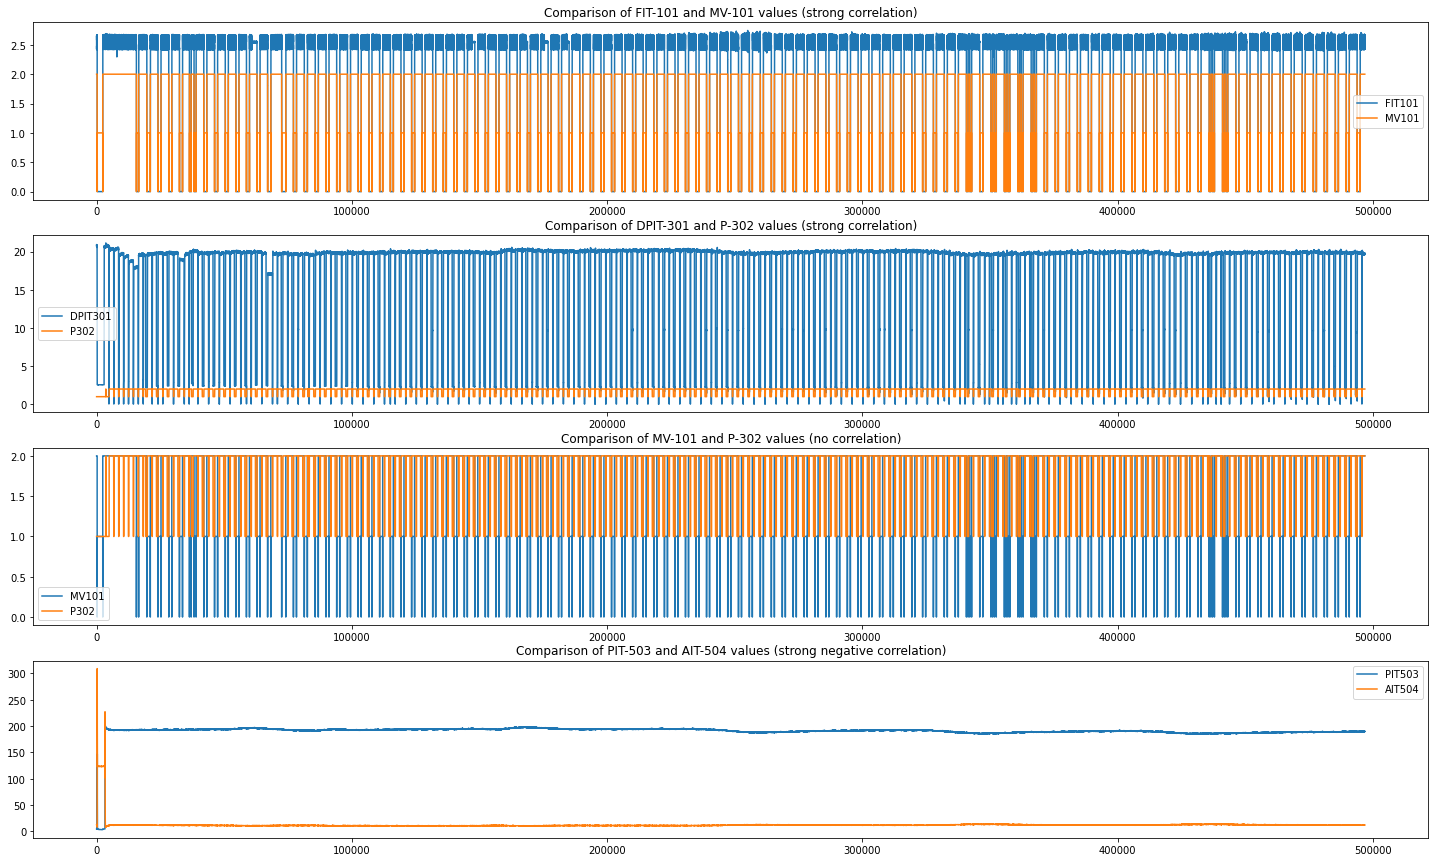

In [7]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(25, 15))
df.plot(ax=ax1, y=['FIT101', 'MV101'], legend=True, title='Comparison of FIT-101 and MV-101 values (strong correlation)')
df.plot(ax=ax2, y=['DPIT301', 'P302'], legend=True, title='Comparison of DPIT-301 and P-302 values (strong correlation)')
df.plot(ax=ax3, y=['MV101', 'P302'], legend=True, title='Comparison of MV-101 and P-302 values (no correlation)')
df.plot(ax=ax4, y=['PIT503', 'AIT504'], legend=True, title='Comparison of PIT-503 and AIT-504 values (strong negative correlation)')
plt.show()

#### Determining potentially abnormal features in the validation set

In [8]:
df_val = pd.read_csv("data/val_data.csv")[0:20000]

df_val_features = df_val.drop(columns=['Id', 'Timestamp'])

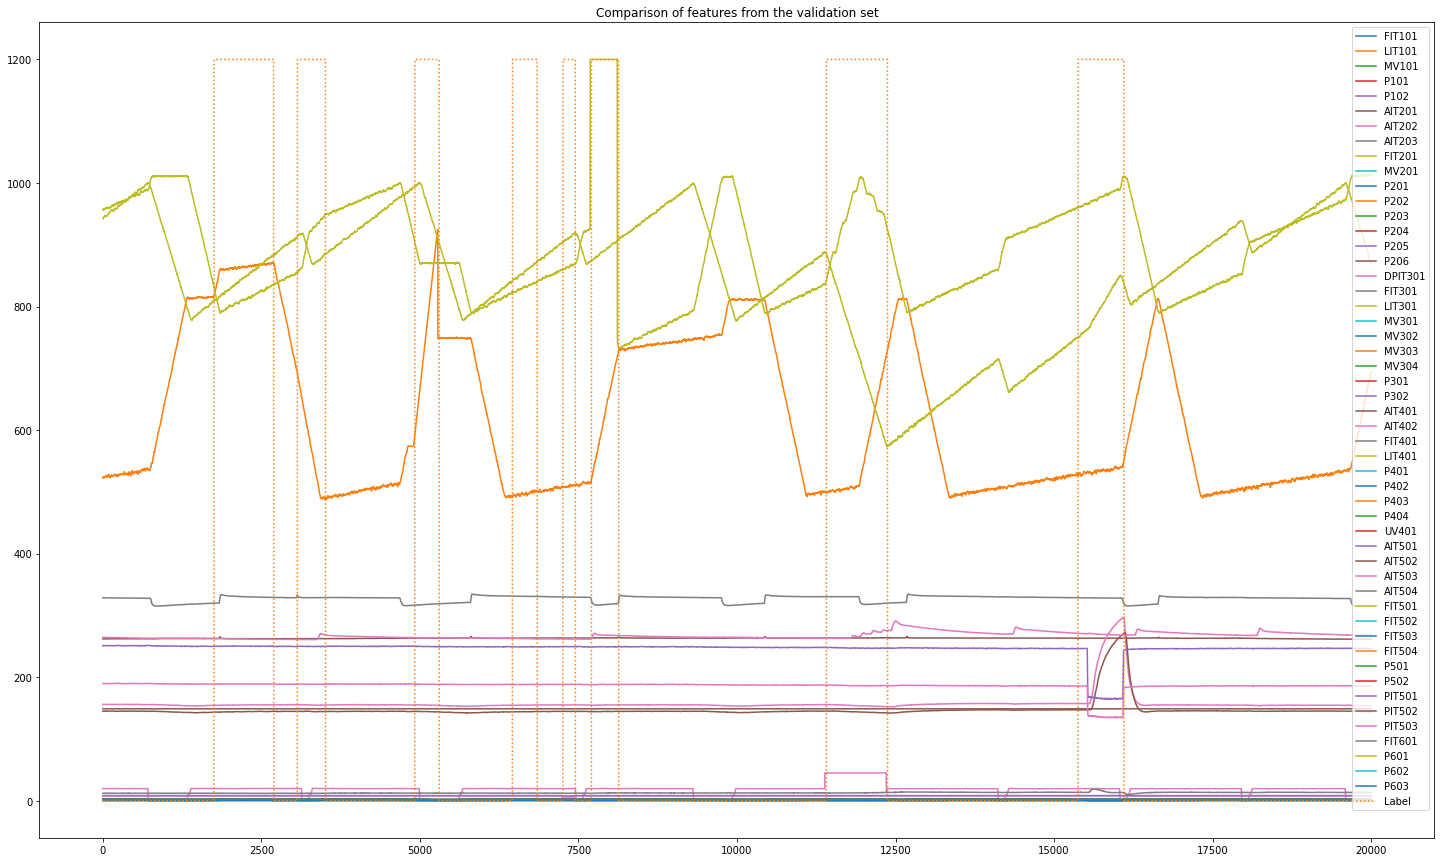

In [9]:
_, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.plot(df_val_features.drop(columns=['Label']))
# Multiply label by the largest value in the dataframe, to make it stand out from the rest of the plot
ax.plot(df_val_features['Label'] * df_val_features.max().max(), linestyle=':')
ax.legend(labels=df_val_features.columns, loc='upper right')
ax.set_title('Comparison of features from the validation set')
plt.show()

### Answers to the questions

#### What types of signals are there?

The data set contains two types of signals, coming from actuators and sensors.
Some data is represented as numerical values (type `float64`) while the others are integers (`int64`) and sometimes can be seen as category labels ()

#### Are the signals correlated? Do they show cyclic behavior?

Looking at the heatmap we can identify certain pairs of features with strong correlation (for instance FIT-101 and MV-101).
Several features seem to show strongly repetitive behavior overtime (eg. DPIT-301 and P-302).
Some feature (eg. P-201 and P-202) take only one value in the data set, which is why they are represented as white strips on the heatmap.
There are exceptions as well - for example the PIT-503 and the values it is correlated with (eg. FIT-401) seems to revolve around certain value, but do not seem to have any specific cyclic behavior.

In the beginning the behavior of the system is highly irregular for all the features.
The reason might be the fact that the system might have been initializing then.
For this reason it might be beneficial to prune the first 40000 entries before training the anomaly detection machine learning algorithms.

## 2. Local outlier factor – Individual

*Author: Konrad Ponichtera*

/var/folders/q0/l_nfq0f150jd0mh72n5gypp40000gn/T/ipykernel_32465/3325708168.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


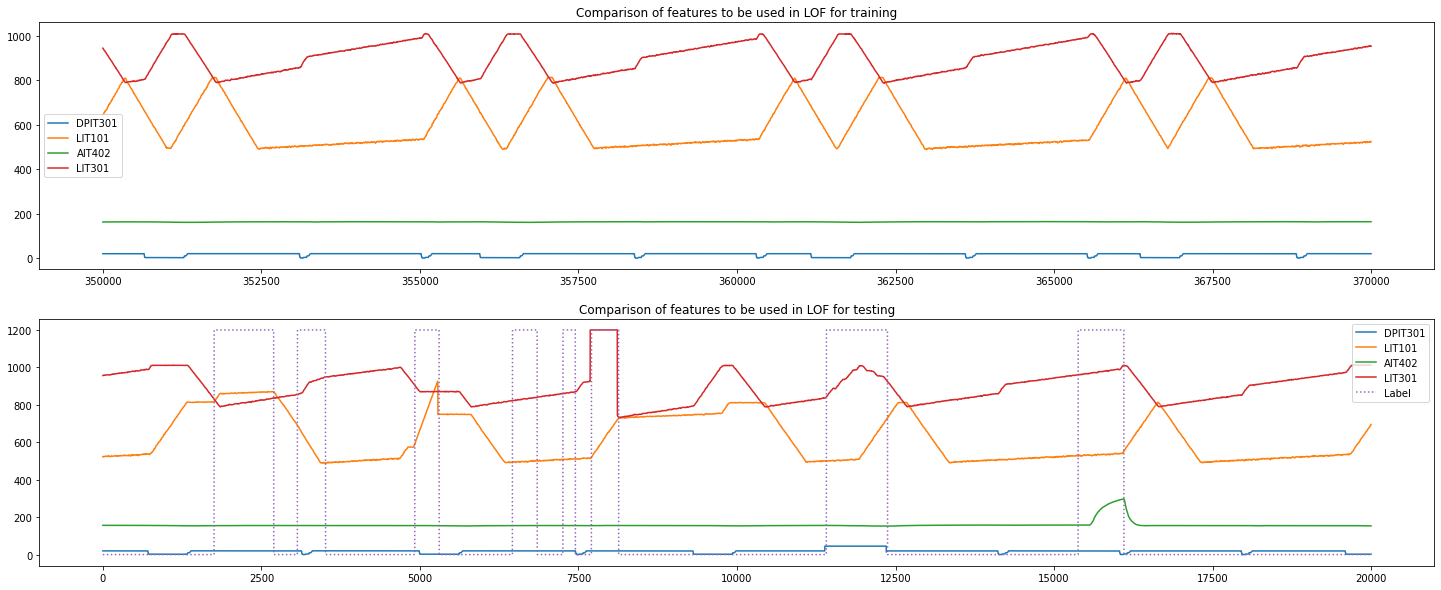

In [10]:
features = ['DPIT301', 'LIT101', 'AIT402', 'LIT301']
features_for_plot = features + ['Label']

X_train = df[features][350000:370000]
y_test = df_val_features[features]
y_test_for_plot = df_val_features[features_for_plot]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
ax1.plot(X_train)
ax1.legend(labels=features)
ax1.set_title('Comparison of features to be used in LOF for training')
ax2.plot(y_test_for_plot.drop(columns=['Label']))
# Multiply label by the largest value in the dataframe, to make it stand out from the rest of the plot
ax2.plot(y_test_for_plot['Label'] * y_test_for_plot.max().max(), linestyle=':')
ax2.legend(labels=features_for_plot)
ax2.set_title('Comparison of features to be used in LOF for testing')
fig.show()

### Plot LOF scores

In [11]:
n_neighbors_to_try = [5, 10, 15, 20, 30]

# Map of amount of neighbors to its LOF
clfs = {}

for n_neighbors in n_neighbors_to_try:
    print(f'Training LOF for {n_neighbors} neighbors')
    clf = LocalOutlierFactor(n_neighbors=n_neighbors, novelty=True, metric='cosine', n_jobs=-1)
    clf.fit(X_train)
    clfs[n_neighbors] = clf

Training LOF for 5 neighbors
Training LOF for 10 neighbors
Training LOF for 15 neighbors
Training LOF for 20 neighbors
Training LOF for 30 neighbors


In [12]:
# Map of amount of neighbors to the scores of the LOF with the given amount of neighbors,
# executed against the validation set
scores = {}

max_score = 1

for n_neighbors in n_neighbors_to_try:
    print(f'Calculating LOF scores for {n_neighbors} neighbors')
    X_scores = clfs[n_neighbors].score_samples(y_test)
    X_scores *= -1
    scores[n_neighbors] = X_scores

    X_max_score = X_scores.max()
    if X_max_score > max_score:
        max_score = X_max_score

Calculating LOF scores for 5 neighbors


/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Calculating LOF scores for 10 neighbors


/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Calculating LOF scores for 15 neighbors


/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Calculating LOF scores for 20 neighbors


/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Calculating LOF scores for 30 neighbors


/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


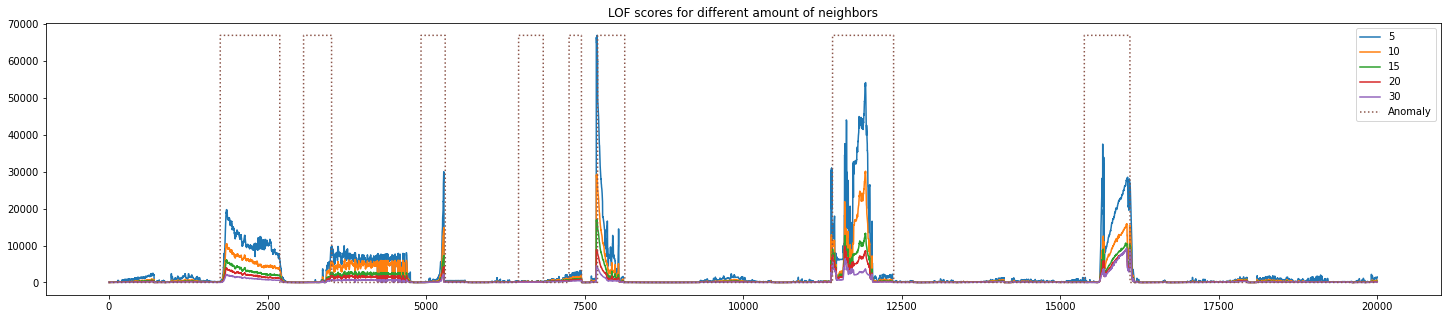

In [13]:
anomaly = pd.DataFrame(scores)

_, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(anomaly)
ax.plot(df_val['Label'] * max_score, linestyle=':')
ax.set_title('LOF scores for different amount of neighbors')
# list(map(str, anomaly.columns)) - convert columns with integer values to strings
ax.legend(labels=list(map(str, anomaly.columns)) + ['Anomaly'])
plt.show()

### Conclusions

We chose four sensors to analyze for anomalies with LOF: DPIT301, LIT101, AIT402 and LIT301.

After plotting their values from the validation set, we can notice that irregularities in the temporal behavior of these features are responsible for several anomalies that occur there.
Since the beginning of the training set is highly irregular (probably due to the system's startup) and we want to train the model on the normal behavior, we chose the interval of the training set that does not contain any irregularities.

#### Choice of the best performing LOF

We executed LOF for 5, 10, 15, 20 and 30 neighbors and plotted their LOF scores.
It can be seen that the sensitivity of anomaly detection decreases as the amount of neighbors increases.
The best balance seems to be provided by the LOF with amount of neighbors equal to 15, since for detection threshold set to around 5000, it will detect all the true anomalies while avoiding misclassification of the interval between 2500 and 5000 as anomalous.

#### Application of LOF

LOF can be used to model point anomalies, which can also span multiple features.
However, its applicability in practice is severely impaired by the slow training and scoring performance.

## 5. N-grams – Individual

*Author: Konrad Ponichtera*

In [14]:
feature = 'LIT101'
df_feature = df[[feature]].to_numpy()

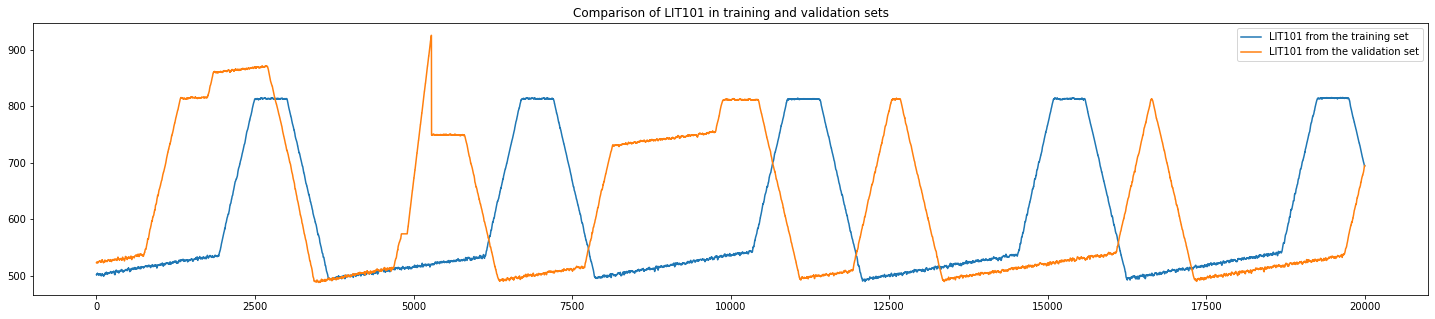

In [15]:
_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(df[feature][100000:100000 + len(df_val_features)].to_numpy())
ax.plot(df_val_features[feature].to_numpy())

ax.legend(labels=[f'{feature} from the training set', f'{feature} from the validation set'])
ax.set_title(f'Comparison of {feature} in training and validation sets')
plt.show()

### Discretizing sensor data

In [16]:
def discretize(discretizer, feature_array):
    """
    Discretizes the passed data.

    Arguments:
        discretizer: Discretizer, fitted with the learning data
        feature_array: Numpy array with data to discretize, using the passed discretizer
    Returns:
        Discretized data, passed as feature_array argument
    """
    bins = discretizer.transform(feature_array)[:, 0]
    vectorizer = np.vectorize(lambda x: int(discretizer.bin_edges_[0][int(x)]))

    return vectorizer(bins)

In [17]:
# Discretizer, fitted on the training data
discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
discretizer.fit(df_feature)

df_feature_discretized = discretize(discretizer, df_feature)

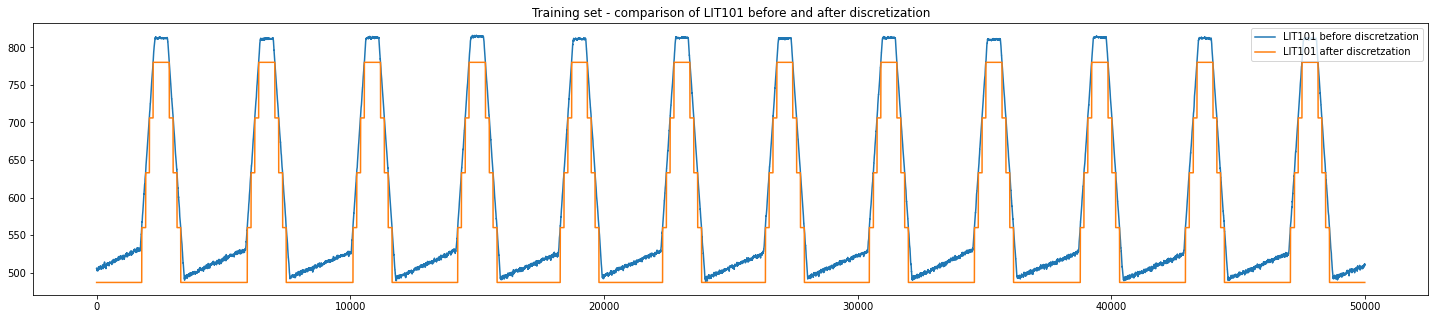

In [18]:
_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(df_feature[150000:200000])
ax.plot(df_feature_discretized[150000:200000])

ax.legend(labels=[f'{feature} before discretzation', f'{feature} after discretzation'], loc='upper right')
ax.set_title(f'Training set - comparison of {feature} before and after discretization')
plt.show()

### Building n-grams

In [19]:
def collect_ngrams(data, window_size, window_step, unique=False, as_strings=False):
    """
    Extracts the n-grams from data

    Arguments:
        data: Numpy array of data to extract the n-grams from
        window_size: Size of the sliding window (n-gram)
        window_step: The step done by the sliding window (if the same as window_size then windows don't overlap)
        unique: If true then unique n-grams from the data will be returned, otherwise all the n-grams will be returned
        as_strings: If true then the returned n-grams will be returned as strings (otherwise as Numpy arrays)
    Returns:
        Numpy array with extracted n-grams
    """
    sliding_windows = np.empty([0, window_size], dtype=np.int8)

    for i in range(0, len(data) - window_size, window_step):
        new_window = data[i:i+window_size]
        if new_window.shape == (window_size,):
            sliding_windows = np.vstack([sliding_windows, new_window])
    if unique:
        sliding_windows = np.unique(sliding_windows, axis=0)

    if as_strings:
        sliding_windows = np.array([str(row) for row in sliding_windows])

    return sliding_windows

In [20]:
# The size of a small window (n-gram) and how large step is performed before new n-gram is extracted
window_size = 3
window_step = 1

# N-grams = unique sliding windows
ngram_names = collect_ngrams(df_feature_discretized[150000:200000], window_size=window_size, window_step=window_step, unique=True, as_strings=True)
print(f'Found n-grams count: {len(ngram_names)}')
print(ngram_names)

Found n-grams count: 21
['[487 487 487]' '[487 487 560]' '[487 560 560]' '[560 487 487]'
 '[560 560 487]' '[560 560 560]' '[560 560 633]' '[560 633 633]'
 '[633 560 560]' '[633 633 560]' '[633 633 633]' '[633 633 706]'
 '[633 706 706]' '[706 633 633]' '[706 706 633]' '[706 706 706]'
 '[706 706 780]' '[706 780 780]' '[780 706 706]' '[780 780 706]'
 '[780 780 780]']


### Building n-gram frequency table

In [21]:
def build_ngram_table(data, large_window_size, large_window_step, ngram_names=None):
    """
    Builds n-gram table, where columns are the n-grams, detected in the data,
    rows are the sliding windows in the data set and cells are the counters
    of how many times given n-gram appeared in a given window.

    Arguments:
        data: Numpy array with the data
        large_window_size: Size of the large sliding window
        large_window_step: The step done by the sliding window (if the same as window_size then windows don't overlap)
        ngram_names: The n-grams to include in the final n-gram array. If None then all discovered n-grams will be included.
    Returns:
        Pandas dataframe with the n-gram table
    """
    df_ngrams = pd.DataFrame()

    for i in range(0, len(data) - large_window_size, large_window_step):
        new_window = data[i:i+large_window_size]

        ngrams = collect_ngrams(new_window, window_size=window_size, window_step=window_step, as_strings=True)
        counter = Counter(ngrams)

        df_window = pd.DataFrame(counter, index=[i])
        df_ngrams = pd.concat([df_ngrams, df_window])

    # Filter ngrams
    if ngram_names is not None:
        df_ngrams = df_ngrams[df_ngrams.columns.intersection(ngram_names)]
        
    # Fill NaNs with zeros, for the windows where the ngram didn't appear
    df_ngrams = df_ngrams.fillna(0)
    return df_ngrams

In [22]:
# The size of a large sliding window, which contains multiple n-grams
large_window_size = 15
large_window_step = 15

df_ngrams = build_ngram_table(df_feature_discretized, large_window_size=large_window_size, large_window_step=large_window_step, ngram_names=ngram_names)

df_ngrams.head()

,[487 487 487],[487 487 560],[487 560 560],[560 560 560],[560 560 633],[560 633 633],[633 633 633],[633 633 560],[633 560 560],[706 706 706],...,[780 780 780],[780 780 706],[780 706 706],[706 706 633],[706 633 633],[560 560 487],[560 487 487],[633 706 706],[706 780 780],[633 633 706]
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Validating

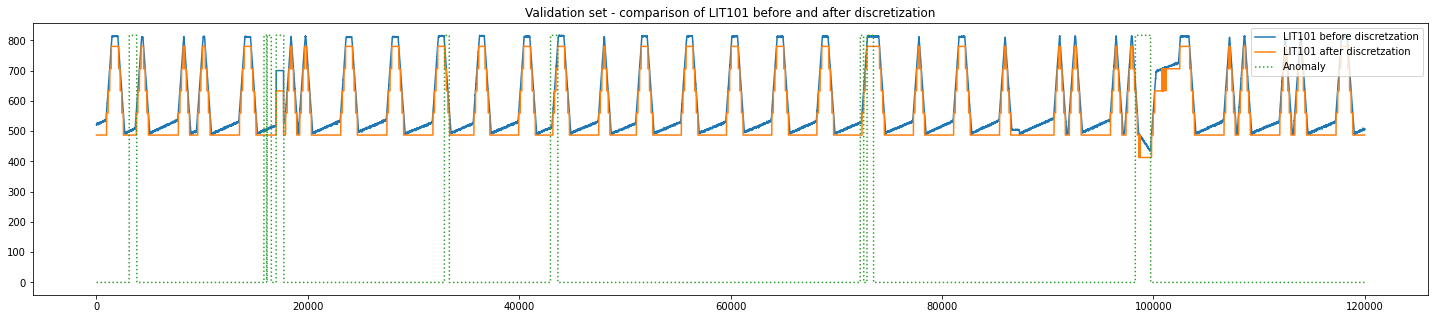

In [23]:
df_val = pd.read_csv("data/val_data.csv")[100000:220000]
df_val_feature = df_val[[feature]].to_numpy()
df_val_label = df_val[['Label']].to_numpy()

df_val_feature_discretized = discretize(discretizer, df_val_feature)

_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(df_val_feature)
ax.plot(df_val_feature_discretized)
# Multiplying the anomaly label by the largest value in the plot, to make it stand out
ax.plot(df_val_label * df_val_feature.max(), linestyle=':')

ax.legend(labels=[f'{feature} before discretzation', f'{feature} after discretzation', 'Anomaly'], loc='upper right')
ax.set_title(f'Validation set - comparison of {feature} before and after discretization')
plt.show()

In [24]:
df_val_ngrams = build_ngram_table(df_val_feature_discretized, large_window_size=large_window_size, large_window_step=large_window_step, ngram_names=ngram_names)
df_val_ngrams.head()

,[487 487 487],[487 487 560],[487 560 560],[560 560 560],[560 560 633],[560 633 633],[633 633 633],[633 633 706],[633 706 706],[706 706 706],...,[780 780 780],[633 633 560],[633 560 560],[560 560 487],[560 487 487],[706 706 780],[780 780 706],[706 706 633],[706 633 633],[780 706 706]
0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/ionbabalau/uni/q4/cs4035-cda/lab2/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


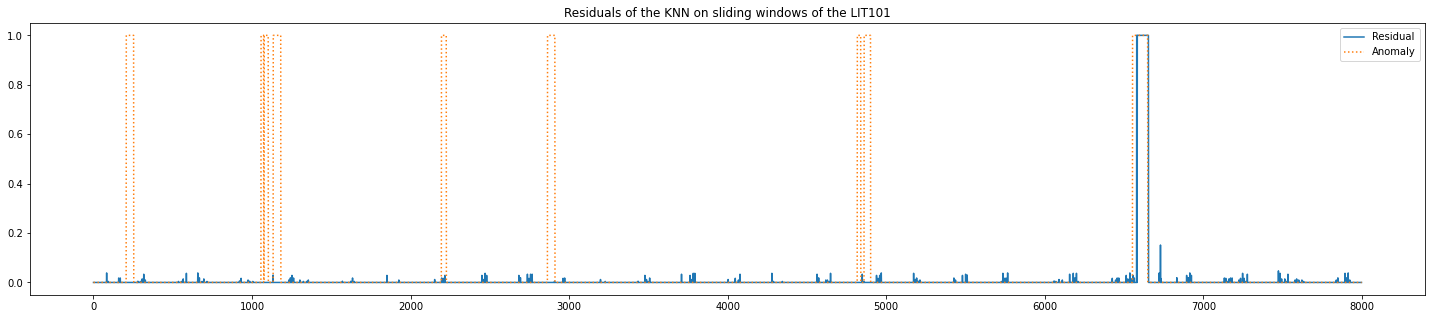

In [25]:
nbrs = NearestNeighbors(n_neighbors=1, metric='cosine')
nbrs.fit(df_ngrams)

residuals, _ = nbrs.kneighbors(df_val_ngrams)

_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(residuals)
# Subsample the original labels set to match the one with the sliding windows
ax.plot(df_val_label[::len(df_val_label)//len(residuals)], linestyle=':')

ax.legend(labels=['Residual', 'Anomaly'], loc='upper right')
ax.set_title(f'Residuals of the KNN on sliding windows of the {feature}')
plt.show()

### Differencing sensor data

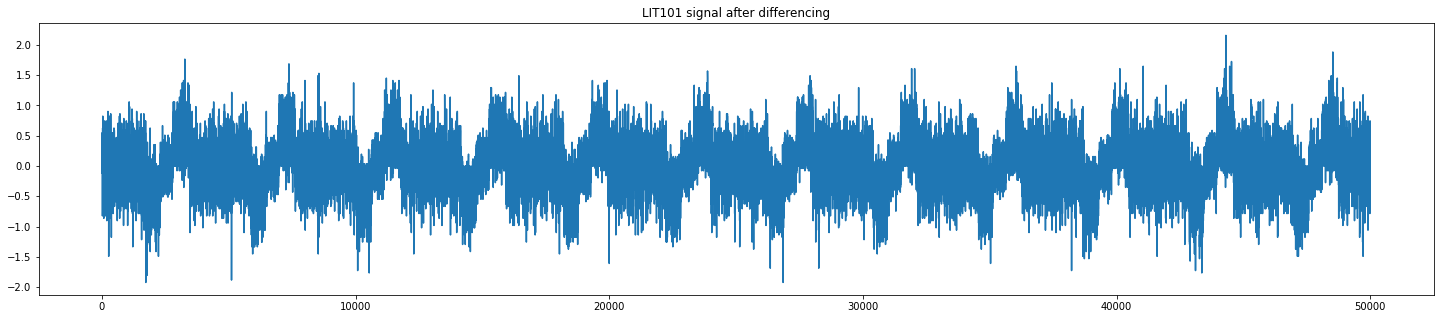

In [26]:
diff_feature = np.copy(df_feature)
for i in range(1, len(diff_feature)):
    diff_feature[i] = df_feature[i-1] - df_feature[i]

diff_feature = diff_feature[1:]

_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(diff_feature[150000:200000])
ax.set_title(f'{feature} signal after differencing')
plt.show()

In [27]:
diff_discretizer = KBinsDiscretizer(n_bins=20000, strategy='uniform', encode='ordinal')
diff_discretizer.fit(diff_feature)

diff_feature_discretized = discretize(diff_discretizer, diff_feature)

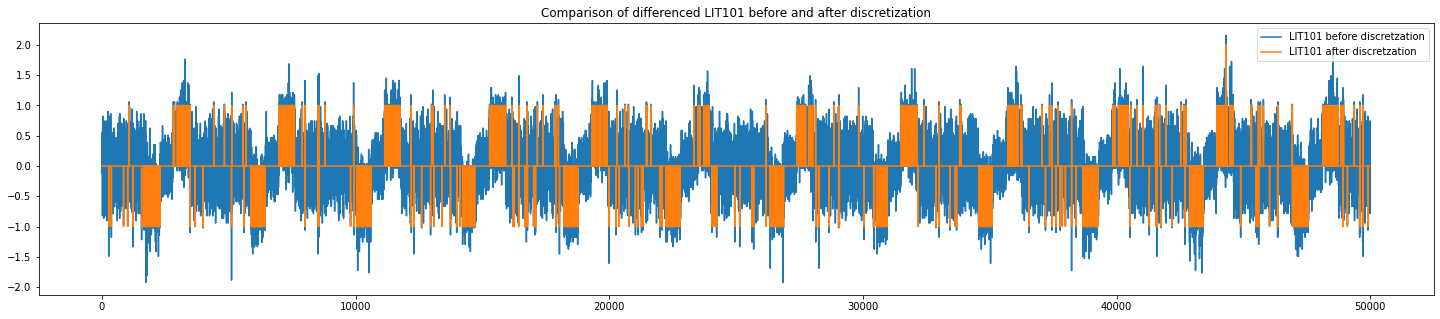

In [28]:
_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(diff_feature[150000:200000])
ax.plot(diff_feature_discretized[150000:200000])

ax.legend(labels=[f'{feature} before discretzation', f'{feature} after discretzation'], loc='upper right')
ax.set_title(f'Comparison of differenced {feature} before and after discretization')
plt.show()

### Conclusions

The feature of choice for this task was LIT101.
Our implementation of the n-gram managed to detect one anomaly out of two that occurred to the signal in the range under analysis.

#### Differencing

In case of our analysed signal, differencing does not bring anything beneficial from perspective of anomaly detection.
Differencing before discretization effectively turns the continuous signal into noise, which would require setting up the bin count to ridiculous amounts (eg. 20000) and would increase the amount of n-grams to unanalyzable amounts.

#### Application of n-grams

N-grams can be used to model contextual anomalies, preferably the ones with cyclic temporal behavior.
This comes from the fact that in the data processing pipeline of this method, it is necessary to collect signal behavior, which is known in advance to be working properly.
That behavior is portrayed by the individual n-grams.

## 3. PCA task – Individual

*Author: Ion Babalau*

### 3a. Plot PCA residuals

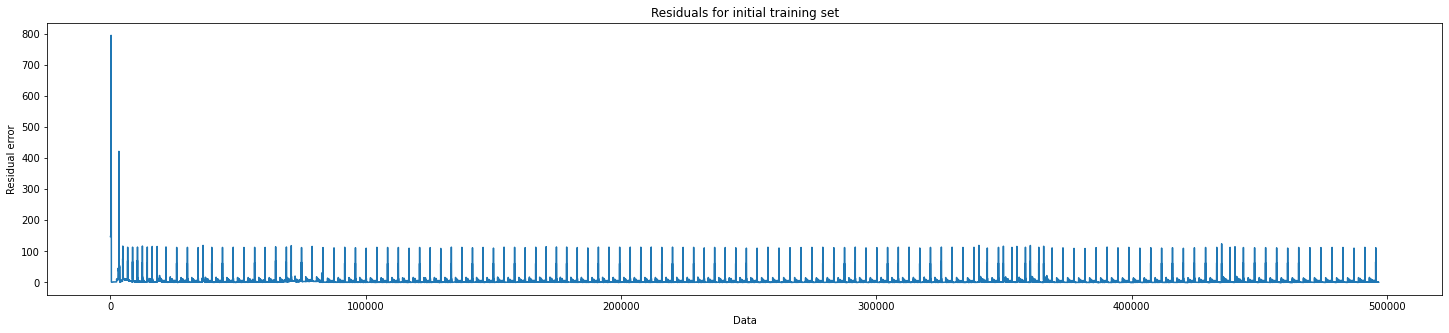

In [29]:
plt.rcParams["figure.figsize"] = (25,5)

# calculate residuals using squared error function
def calc_residuals(original_arr, reconstructed_arr):
    return pd.Series(data=np.sum(np.square(np.asarray(original_arr) - np.asarray(reconstructed_arr)), axis=1), index=original_arr.index)

# apply pca, calculate and return residuals
def apply_pca(df, n_comp):
    pca = PCA(n_components=n_comp, random_state=0)
    pca.fit(df)
    df_pca = pd.DataFrame(pca.transform(df))
    df_inverse = pd.DataFrame(pca.inverse_transform(df_pca))
    return pca, calc_residuals(df, df_inverse)

def plot_res(residuals, title):
    _, ax = plt.subplots(1, 1, figsize=[25,5])
    ax.plot(residuals, label='residual score')
    ax.set_xlabel('Data')
    ax.set_ylabel('Residual error')
    ax.set_title(title)

df = pd.read_csv("data/train_data.csv")
# drop unecessary columns
df = df.drop(columns=['Id', 'Timestamp', 'Label'], errors='ignore')
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(columns=[col])

# scale data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns)

_, residuals = apply_pca(df_scaled, 0.95) 
plot_res(residuals, 'Residuals for initial training set')

In order to use PCA for anomaly detection, we first remove some uncessary columns from the train dataset and scale the values. We then use PCA with a a number of components that achieves an explained variance of 95%. Then we calculate the residuals using squared error and plot them.

As can be seen from the plot, the data in the beginning is highly irregular, probably due to the system booting up. Thus, we decide to remove it from the training set.

relevant columns 40


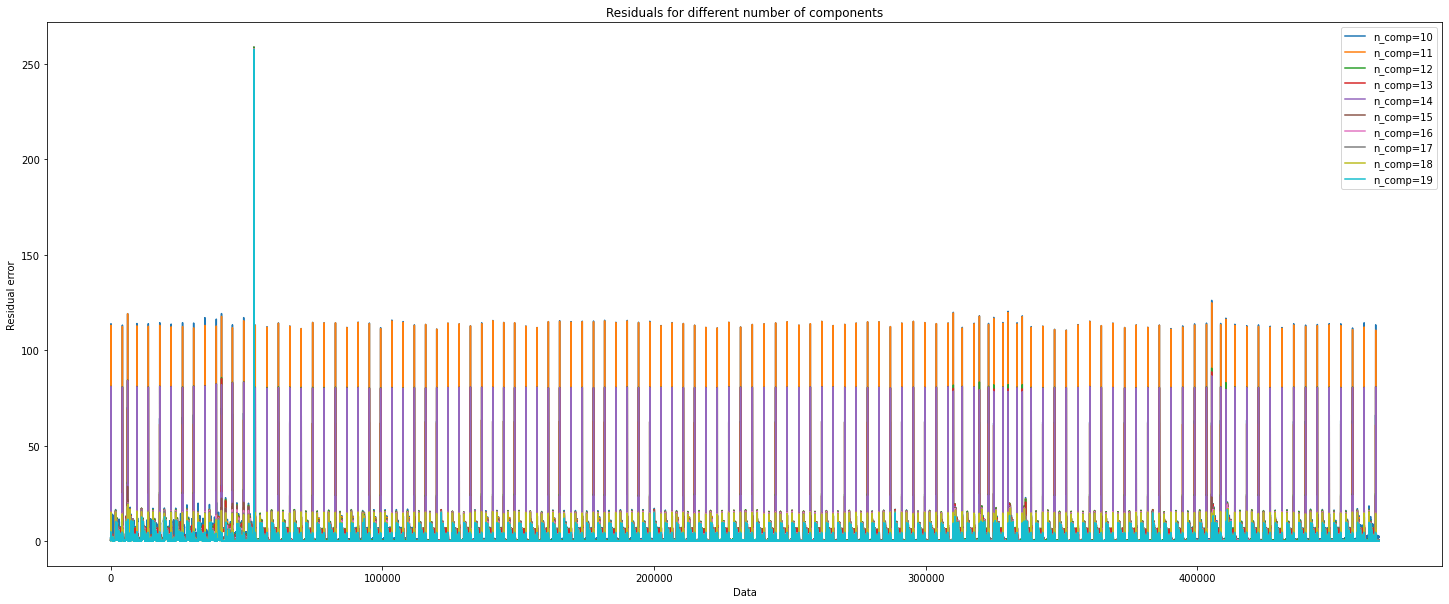

In [30]:
df_train = df_scaled.copy()[30000:]
df_train = df_train.reset_index(drop=True)
print('relevant columns', len(df_train.columns))
# now repeat the experiment with various number of components
max_height = 100
_, ax = plt.subplots(1, 1, figsize=[25,10])
for i in range(10,20):
    _, res = apply_pca(df_train, i)
    # scale residuals
    #res = [max_height if x > max_height else x for x in res]
    ax.plot(res, label='n_comp=' + str(i))
ax.set_xlabel('Data')
ax.set_ylabel('Residual error')
ax.set_title('Residuals for different number of components')
plt.legend()
plt.show()

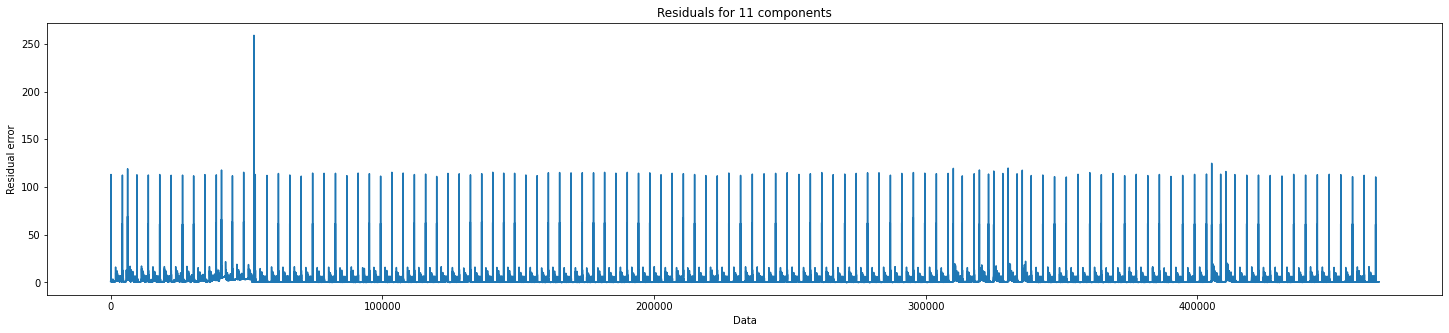

In [31]:
n_comp = 11
pca, residuals = apply_pca(df_train, n_comp)
plot_res(residuals, 'Residuals for 11 components')

Next we choose a threshold of 119 and plot the anomalies again.

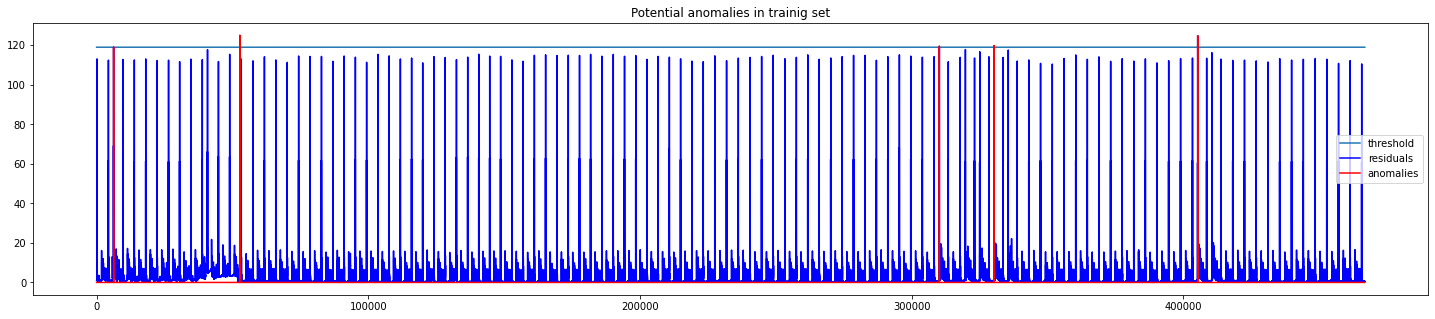

In [32]:
max_size = 125
threshold = 119
# downscale large anomalies
scaled_residuals = [max_size if x >= max_size else x for x in residuals]
anomalies = [x if x > threshold else 0 for x in scaled_residuals]
plt.plot([threshold] * len(scaled_residuals), label='threshold')
plt.plot(scaled_residuals, 'b', label='residuals')
plt.plot(anomalies, 'r', label='anomalies')
plt.title('Potential anomalies in trainig set')
plt.legend()
plt.show()

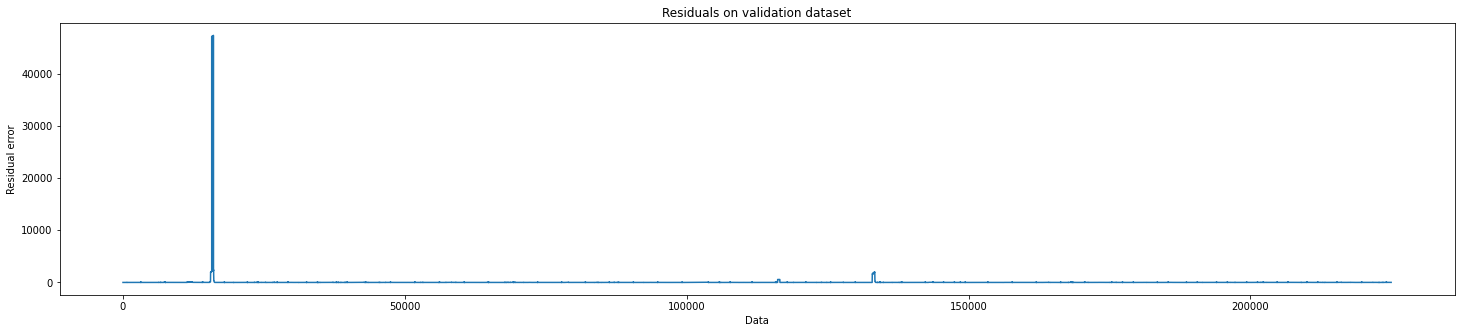

In [33]:
# evaluate on val dataset using previously fitted pca
df_val = pd.read_csv("data/val_data.csv")
y_true = df_val['Label']
# keep same columns as in training set
for col in df_val.columns:
    if col not in df_train.columns:
        df_val = df_val.drop(columns=col)
df_val = pd.DataFrame(scaler.fit_transform(df_val.to_numpy()), columns=df_val.columns)

df_pca = pd.DataFrame(pca.transform(df_val))
df_inverse = pd.DataFrame(pca.inverse_transform(df_pca))
residuals = calc_residuals(df_val, df_inverse)
plot_res(residuals, 'Residuals on validation dataset')

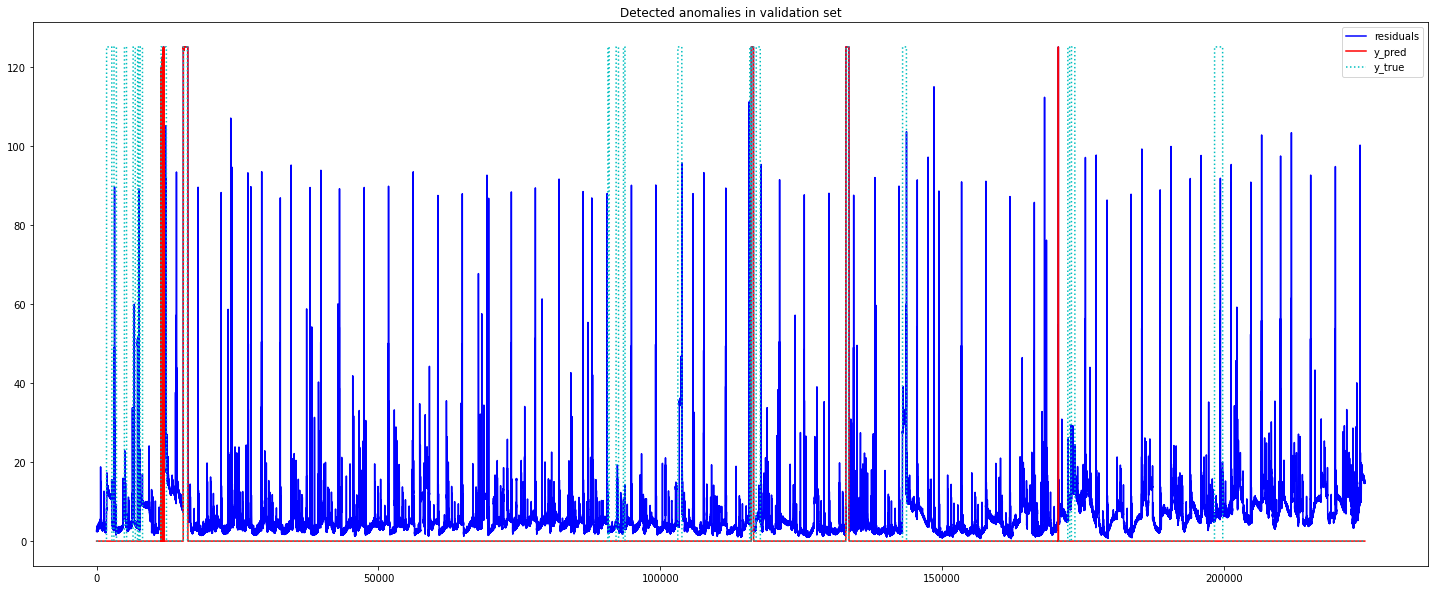

In [34]:
# downscale residuals
scaled_residuals = [max_size if x >= max_size else x for x in residuals]
anomalies = [x if x > threshold else 0 for x in scaled_residuals]
plt.figure(figsize=[25,10])
plt.plot(scaled_residuals, 'b', label='residuals')
plt.plot(anomalies, 'r', label='y_pred')
plt.plot(y_true * np.max(anomalies), 'c', label='y_true', linestyle=':')
plt.title('Detected anomalies in validation set')
plt.legend()
plt.show()

F1 score 0.24371192001249803


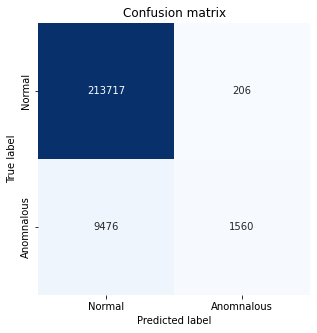

In [35]:
def plot_cm(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = ['Normal', 'Anomnalous']
    mat = [[tn, fp], [fn, tp]]
    plt.figure(figsize=[5,5])
    plt.title('Confusion matrix')
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    return tp, fp, f1_score(y_true, y_pred)

y_pred = [1 if x > 1 else 0 for x in anomalies]
tp, fp, f1 = plot_cm(y_true, y_pred)
print('F1 score', f1)


In [36]:
# kaggle stuff
df_test = pd.read_csv("data/test_data.csv")
ids = df_test['Id']
# keep same columns as in training set
for col in df_test.columns:
    if col not in df_train.columns:
        df_test = df_test.drop(columns=col)
df_test = pd.DataFrame(scaler.fit_transform(df_test.to_numpy()), columns=df_test.columns)

df_pca = pd.DataFrame(pca.transform(df_test))
df_inverse = pd.DataFrame(pca.inverse_transform(df_pca))
residuals = calc_residuals(df_test, df_inverse)
scaled_residuals = [max_size if x >= max_size else x for x in residuals]
anomalies = [1 if x > 40 else 0 for x in scaled_residuals]
df_predictons = pd.DataFrame({'Id': ids, 'Label': anomalies})
df_predictons.to_csv('data/submission.csv', index=False)

### 3b. Analysis and answers to the questions

PCA is useful for anomaly deteciton, because anomalous data points will have a higher residual score than normal ones. It is important to choose the number of components right, as well as the threshold for detection, because the performance of the detector will heavily rely on these parameters. From the experiments, we noticed that the higher the number of components is, the lower the residual error will be, thus it will be harder to choose a threshold.

PCA detects point anomalies in the data, since it looks at multiple feature per point independently.


## 4. Regression task – Individual

*Author: Ion Babalau*

### 4a. Print relevant plots and/or metrics to determine the parameters.

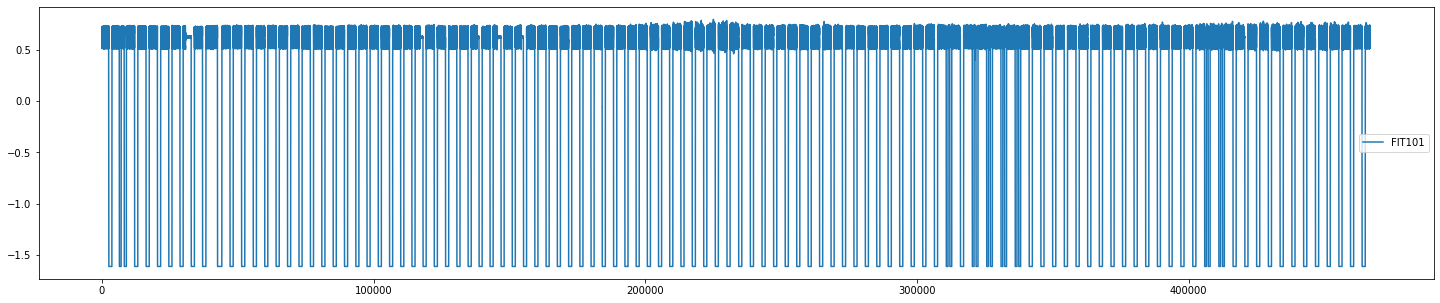

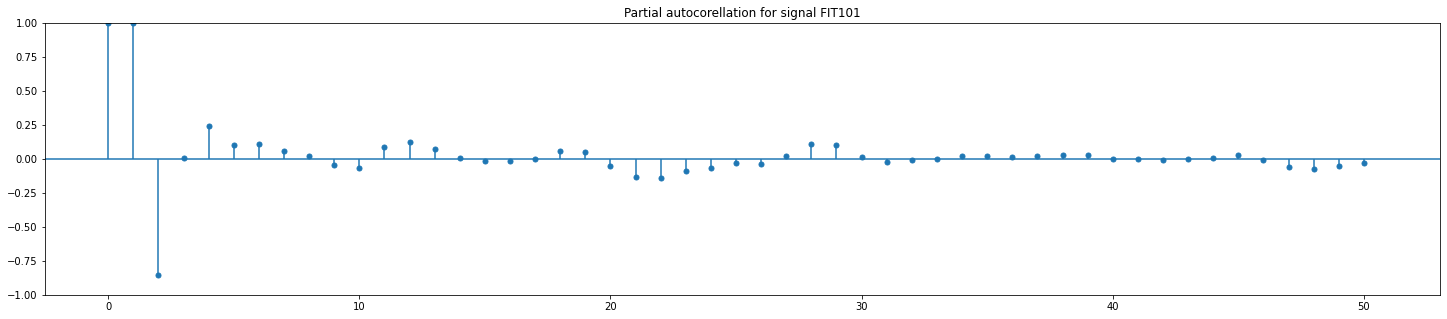

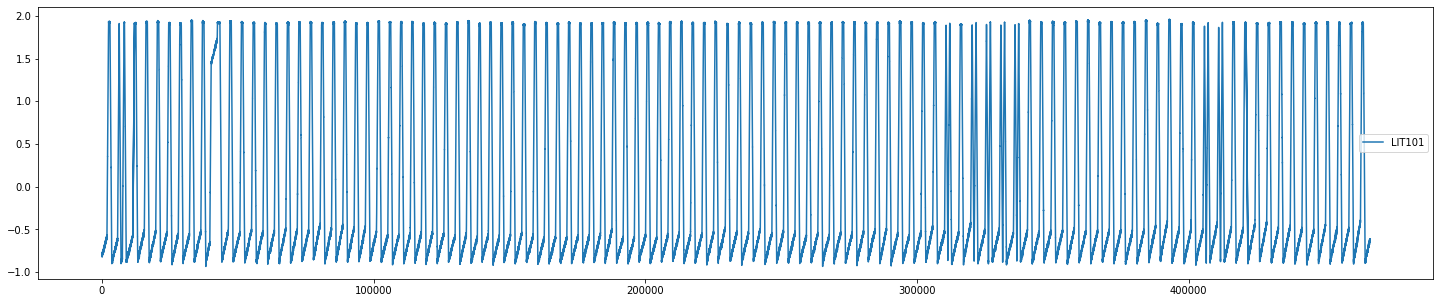

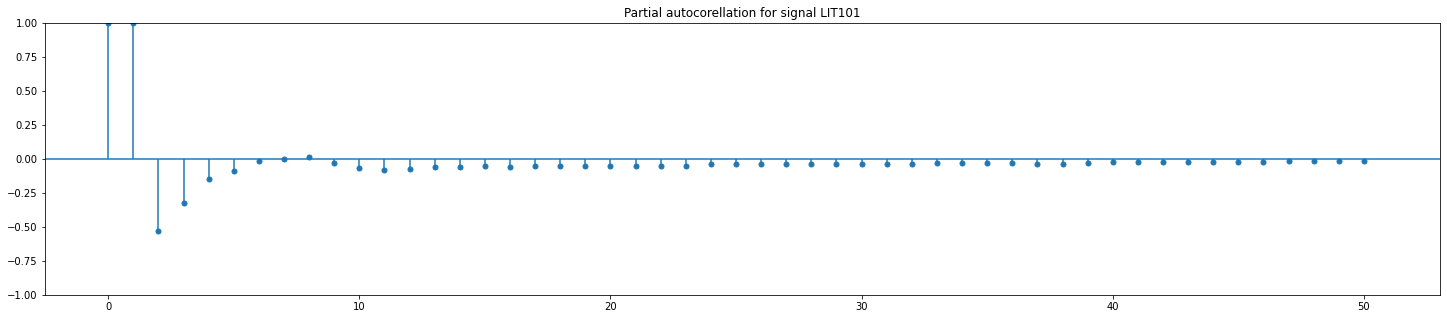

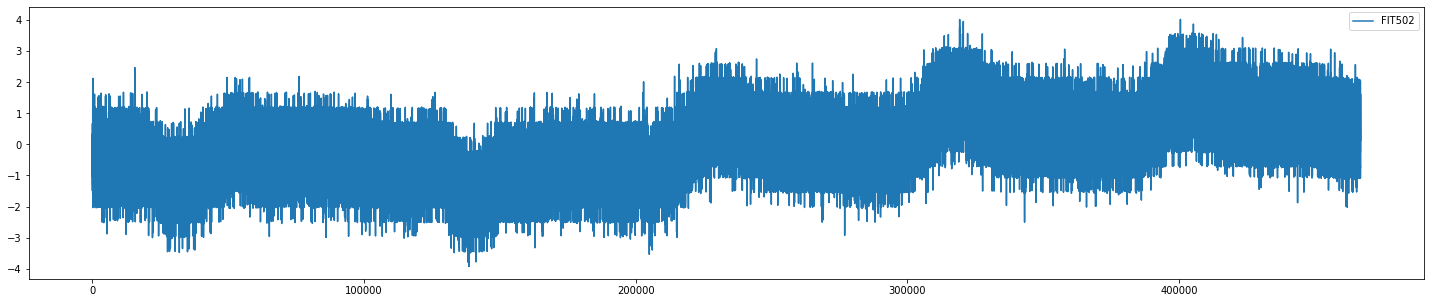

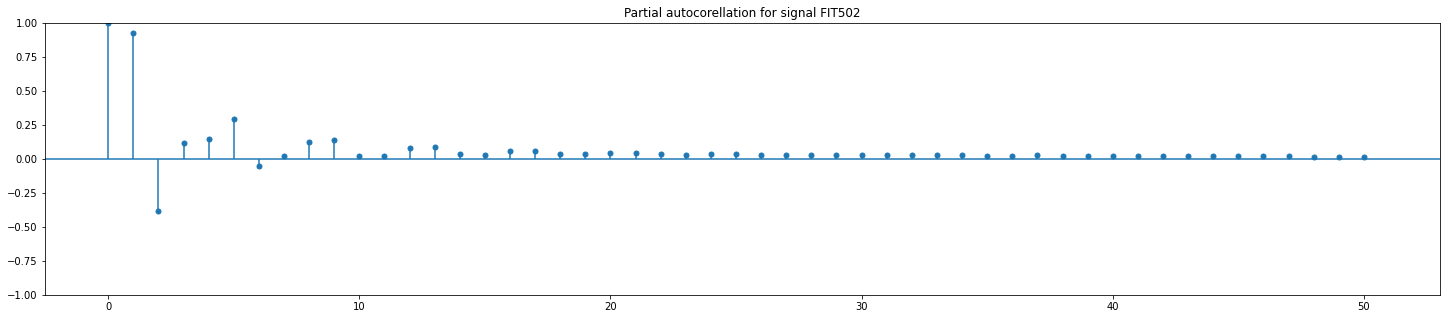

In [37]:
# prepare data
df_train = pd.read_csv("data/train_data.csv")[30000:]
df_train = df_train.drop(columns=['Id', 'Label', 'Timestamp'])
df_val = pd.read_csv("data/val_data.csv")
labels = df_val['Label']
df_val = df_val.drop(columns=['Id', 'Timestamp', 'Label'])
signals = ['FIT101', 'LIT101', 'FIT502']

scaler = StandardScaler()
scaler.fit(df_train)
df_train = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
df_val = pd.DataFrame(scaler.transform(df_val), columns=df_val.columns)

# plot signals and pacf
for signal in signals:
    series = df_train[signal].to_numpy()
    plt.plot(series, label=signal)
    plt.legend()
    plt.show()
    fig, ax = plt.subplots(figsize=(25, 5))
    plot_pacf(series, lags=50, ax=ax, method='ywm')
    plt.title('Partial autocorellation for signal ' + signal)
    plt.show()

We choose three different signals which show interesting behaviour and plot their partial autocorelation (PACF).
PACF describes the direct relationship between an observation and its lagged counterpart. So chosing a window lenght which corresponds to a positive PACF should result in better predictions.

For FIT101, we will experiment with window sizes 4 and 10.
The PACF for the LIT101 signal is is mostly negative, except for 8 when it is close to 0. Thus, we will use a window size of 8 for that signal.
Lastly for FIT502, we will choose window size 5.

In [38]:
def prepare_data(df_train, df_val, signal, window, use_diff):
    # whether to use differencing on the training data
    if use_diff:
        series = df_train[signal].diff().to_numpy()[1:]
        val_series = df_val[signal].diff().to_numpy()[1:]
    else:
        series = df_train[signal].to_numpy()
        val_series = df_val[signal].to_numpy()

    # each row in X will contain the values from a window used to predict the next value
    X_train = []
    for i in range(window, len(series)):
        X_train.append(series[i - window:i])
    y_train = series[window:]

    X_test = []
    for i in range(window, len(val_series)):
        X_test.append(val_series[i - window:i])
    y_test = val_series[window:]
    return X_train, y_train, X_test, y_test

def calc_residuals(original_arr, reconstructed_arr):
    return pd.Series(data=np.square(original_arr - reconstructed_arr))

# plot confusion matrix and return relevant scores
def plot_cm(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = ['Normal', 'Anomnalous']
    mat = [[tn, fp], [fn, tp]]
    _, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.set_title('Confusion matrix')
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    return tp, fp, f1_score(y_true, y_pred)

def lin_regression(signal, window, scale_factor, use_diff):
    X_train, y_train, X_test, y_test = prepare_data(df_train, df_val, signal, window, use_diff)
    # train our regressor
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    # if we use differencing, skip the first value
    if use_diff:
        y_true = labels[window + 1:]
    else:
        y_true = labels[window:]
    # predict on validation data
    predictions = reg.predict(X_test)
    residuals = calc_residuals(y_test, predictions)
    # upscale residuals to better see the error
    thres = 10
    res_scaled = [thres if x * scale_factor > thres else x * scale_factor for x in residuals]
    y_pred = [1 if x == thres else 0 for x in res_scaled]
    _, ax = plt.subplots(1, 1, figsize=(25, 5))
    ax.plot(res_scaled, label='residual error')
    ax.plot(y_true * thres, 'c', label='y_true', linestyle=':')
    ax.plot(np.asarray(y_pred) * thres, 'r', label='y_pred')
    if use_diff:
        ax.set_title('Detected anomalies for signal ' + signal + ' for window size ' + str(window) + ' with differencing')
    else:
        ax.set_title('Detected anomalies for signal ' + signal + ' for window size ' + str(window))
    ax.legend()
    _, _, f1 = plot_cm(y_true, y_pred)
    print('F1 score', f1)


### 4b. Plots to study the detected anomalies

F1 score 0.00018117583114412537
F1 score 0.0


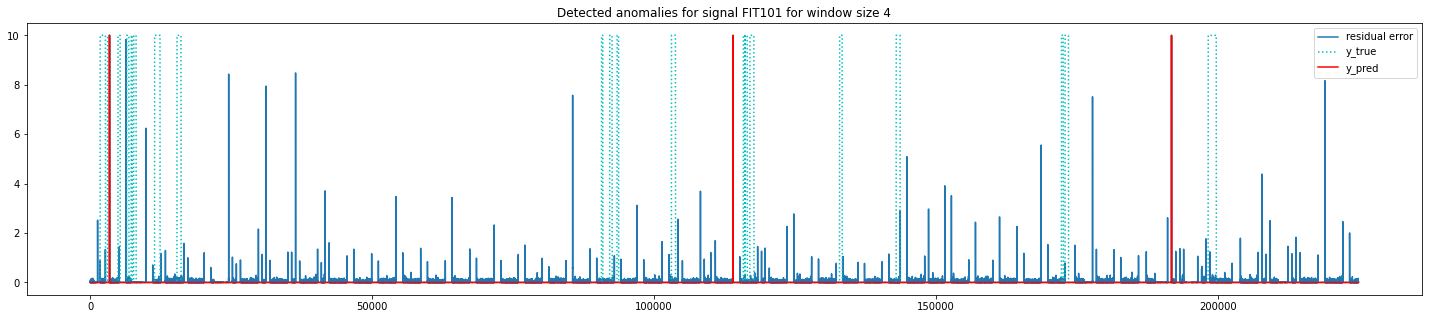

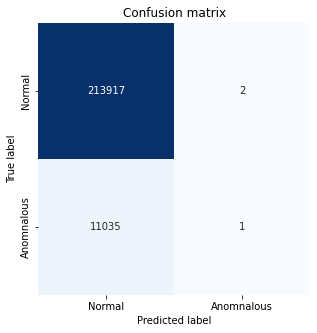

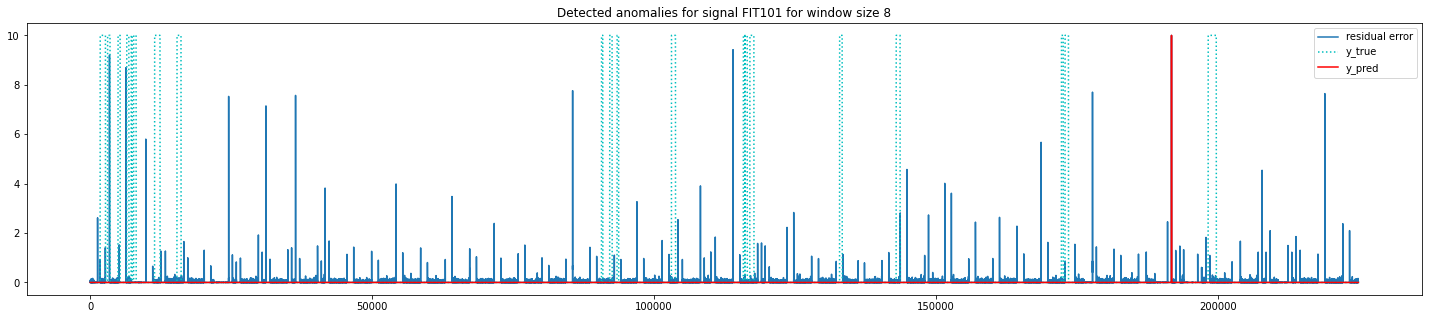

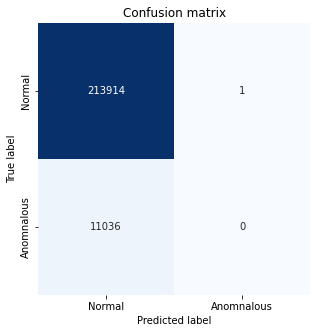

In [39]:
signal = signals[0]

# positive pacf example, no differencing
lin_regression(signal, 4, 80, False)
# negative pacf example, no differencing
lin_regression(signal, 8, 80, False)

For detecting anomalies using linear regression, we first choose a window size, then create the training and validation data.
Our window size is 4, so we will use 4 sesor samples to predict the fifth one.

After training the regressor, we make predictions on the validation set, and calculate the error between the original and predicted values, which will be our residual error. Then we scale it with a custom factor for easier visualization, and set a threshold which we will use to clasify anomalies. We then plot the true anomalies, predicted anomalies, and the residual error, as well as the confusion matri.

As can be seen, the perofmance of the regressor for the first signal FIT101 is not that great, hardly detecting any anomalies.

F1 score 0.00018115942028985507


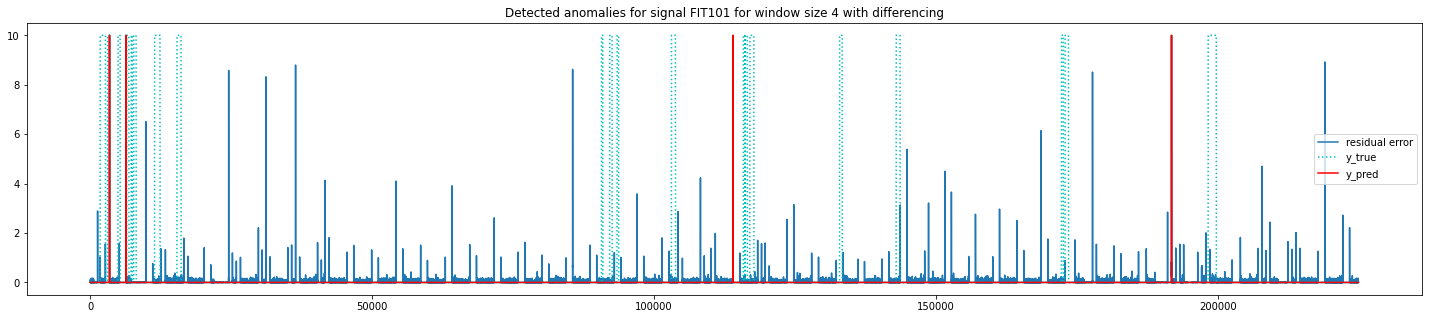

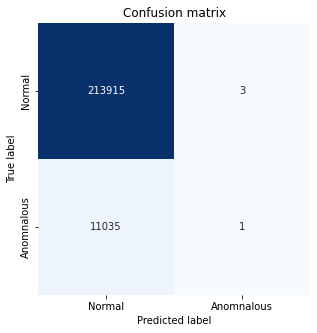

In [40]:
# positive pacf example, with differencing
lin_regression(signal, 4, 90, True)

We then repeat the experiment for window size 4, but with differencing applied, making the series more stationary.

However, the performance stays the same.

F1 score 0.0025337073568002895


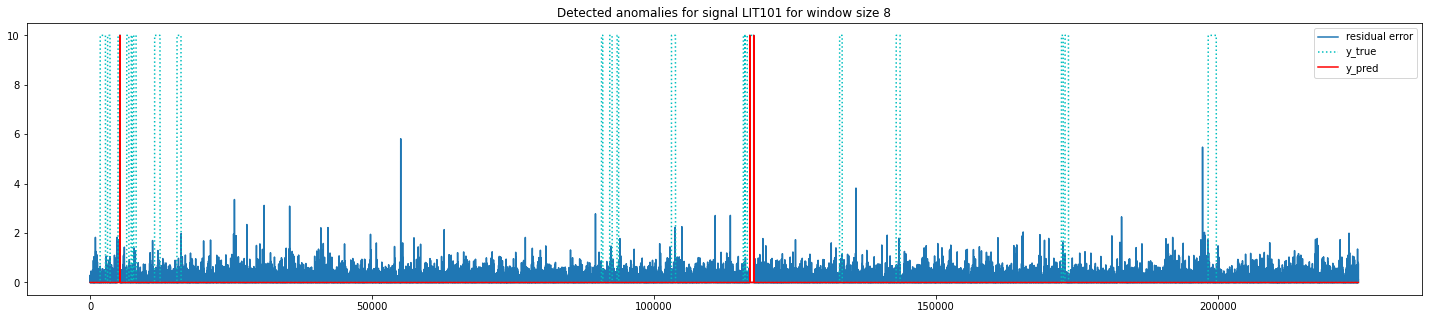

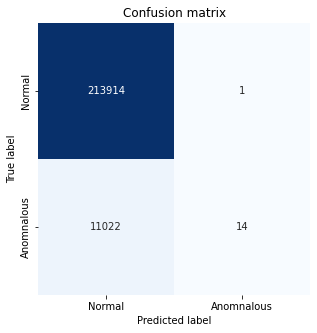

In [41]:
signal = signals[1]
lin_regression(signal, 8, 10000, False)

F1 score 0.037642045454545456


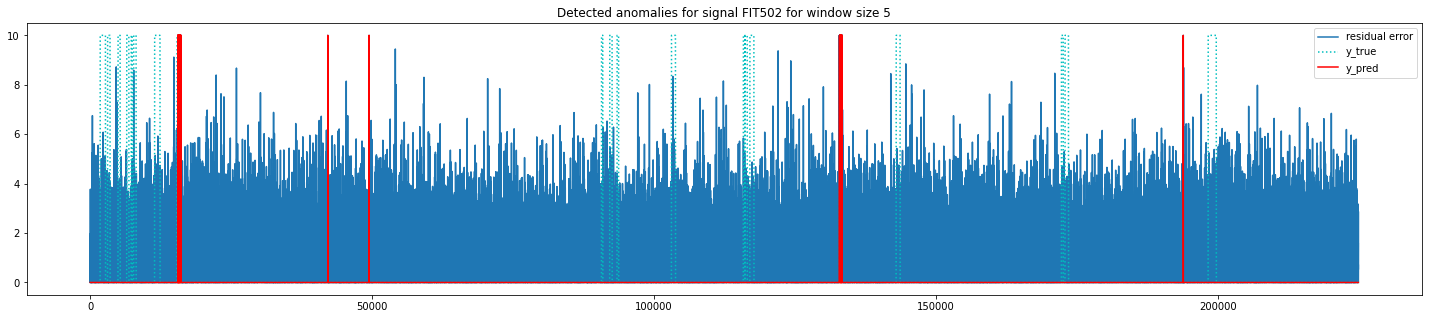

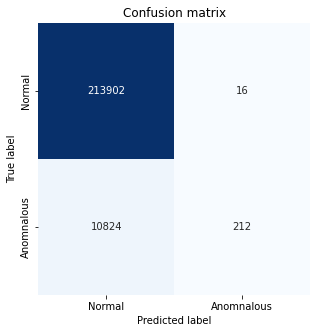

In [42]:
signal = signals[2]
lin_regression(signal, 5, 5, False)

### 4c. Analysis and answers to the questions

In conclusion, the linear regressor with a sliding window is not a good method of anomaly detection.
This method should be able to detect contextual anomalies, the context in this case being the previous window_size values.
When the predicted values is very different from the actual one, the residual error will be high, signaling an anomaly.

Differencing did not make a difference (pun intended) in the performance of the model, although it did make the data more stable by eliminating trend and seasonality.

We have experimented with serveral types of signals and window sizes, the FIT502 signal having the best performance.

## 6. Comparison and conclusions

### Point anomalies - LOF and PCA

#### Comparison

Local outlier factor algorithm performs very well when identifying anomalies in the data - during our tests it managed to detect all five anomalies that occurred in the ananlyzed interval of the testing data, with only one false positive, which could be mitigated by setting appropriate threshold.

However, it is also very slow when fitting, as well as when computing the LOF scores.
The fitting and scoring performance also degrades significantly as the more features are added and as the training data set grows.

PCA on the other hand is fast to fit on the data, and detects anomalies with as low as 11 principal components. The number of components and chosen threshold are the most important parameters for the anomaly detection tasks, and can be tweaked to improve performance.

#### Evaluation

For evaluating PCA, we have chosen the F1 metric, because it combines precision and recall, which are both relevant for anomaly detection, since we aim to maximize TP and minimize FP. We also plot the confusion matrix, for a better visualization of detected anomalies.

We evaluated PCA on the whole validation set, and achieved an F1 score of 0.24. The confusion matrix shows that it managed to identify only 1560 anomalies, but on the other hand it has few False Positives. As mentioned, the performance of the model can probably be improved by tweaking the number of components and the threshold.

The evaluation of the performance of LOF has been skipped due to how computationally expensive it to execute.
Training LOF on four features and less than 10% of the training data takes a long time, yet alone on the whole validation dataset and all the features.
The same applies to the LOF score calulcation step.

### Contextual anomalies - n-gram and linear regression

#### Comparison

The n-grams, combined with the sliding windows, managed to detect one of two contextual anomalies in the analyzed interval of the testing data.
Although no false positives were detected, the algorithm is very sensitive to the n-gram and individual window sizes. 
For the vast majority of tested values for these parameters, the noise in the values of residuals would make it impossible to distinguish the abnormal behavior.

The process of building the n-gram table also gets very computationally expensive as the size of the windows decreases or the overlapping increases.
This means that it can be feasibly applied only to a limited amount of sensors, for which the size of the window does not have to be small to the point that it would make the execution too long.

Linear regression with sliding window requires choosing a lot of parameters: signal, window size, threshold. Another downside of this approach is the difficulty of choosing a threshold. Because the residuals are very small, they often need to be upscaled for better visualization, and only then a threshold can be chosen. For these reasons, perhaps it is more optimal to run a grid search on various signals, to determine the best parameters.

#### Evaluation

We evaluated sliding window linear regression on several sensors, and the best F1 score we got is 0.037. This result might have been caused by a poor selection of parameters. Thus, it is not recommended to use this method for anomaly detection.

Similarly as with LOF, the evaluation of n-gram has been skipped.
Building the n-gram table for one signal takes very long time already.
In order to collect the anomalies in the whole data set, it would be necessary to build separate tables for all the features, which would make the execution time infeasible.

### Which method is the most applicable in practice

Having looked through all the aforementioned methods, it is safe to say that PCA is the most feasible from the practical point of view.
The SWaT data often consists of large amount of features, collected from multiple sensors, so the dimensionality reduction offered by PCA is a huge benefit.
This makes the it much faster to execute and therefore more useful to be applied in the mission-critical systems, which process large amount of data in the real time.